# STAT 421 Final Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import torch
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import Dataset, DataLoader

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tqdm.notebook import tqdm
from tqdm.notebook import trange

import warnings
warnings.filterwarnings('ignore')
bc_df = pd.read_csv('PLCOrelev.csv')
bc_df.head()

print(bc_df.columns)
bc_df

Index(['ID', 'caco', 'agebas', 'PRS', 'famhist', 'menarche', 'parity', 'birth',
       'agemeno', 'height', 'bmi', 'everhrt', 'currhrt', 'alcohol',
       'smoke.st'],
      dtype='object')


,ID,caco,agebas,PRS,famhist,menarche,parity,birth,agemeno,height,bmi,everhrt,currhrt,alcohol,smoke.st
0,22851,1,66,-0.067874,0,12.5,3,22.0,52,1.6764,24.261256,1,0,0.014,1
1,22852,0,61,0.176942,0,14.5,4,22.0,52,1.7018,25.111940,0,0,33.163,3
2,22853,1,64,0.602125,0,12.5,3,22.0,52,1.5748,31.891559,1,0,0.853,3
3,22855,1,74,0.242642,1,12.5,2,27.0,56,1.6510,28.015118,0,0,2.387,1
4,22857,0,67,0.243387,0,12.5,4,27.0,52,1.6510,24.012958,0,0,44.153,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,24625,0,58,-0.178920,1,12.5,2,32.0,36,1.5494,25.561362,1,1,0.010,1
1231,24626,1,72,0.003504,0,12.5,3,22.0,56,1.6002,34.614925,0,0,47.919,1
1232,24627,1,64,0.221074,0,9.0,2,22.0,56,1.6002,25.206766,0,0,0.213,3
1233,24628,0,60,0.257146,1,14.5,3,22.0,42,1.6002,23.076617,0,0,25.141,1


## Data Dictionary 


![Screen Shot 2024-04-25 at 1.47.24 PM](Screen%20Shot%202024-04-25%20at%201.47.24%20PM.png)


![Screen Shot 2024-04-25 at 1.48.35 PM](Screen%20Shot%202024-04-25%20at%201.48.35%20PM.png)


# Logistic regression model

In [13]:


# defining features and target
features = ['agebas', 'bmi', 'agemeno', 'menarche', 'parity', 'famhist', 'PRS', 'alcohol', 'birth', 'height', 'smoke.st', 'currhrt', 'everhrt']
X = bc_df[features]
y = bc_df['caco'] #target variable, 1 = has breast cancer, 0 = doesn't have breast cancer

# spliting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 24)

#standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#train logistic regression model 
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)

#predict on testing set
y_pred = lr_model.predict(X_test_scaled)

#evaluate model 
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

#classification report
print("\nClassification Report: ")
print(classification_report(y_test, y_pred))

#confusion matrix
print("\nConfusion Matrix: ")
print(confusion_matrix(y_test, y_pred))


Accuracy:  0.5951417004048583

Classification Report: 
              precision    recall  f1-score   support

           0       0.62      0.66      0.64       134
           1       0.56      0.52      0.54       113

    accuracy                           0.60       247
   macro avg       0.59      0.59      0.59       247
weighted avg       0.59      0.60      0.59       247


Confusion Matrix: 
[[88 46]
 [54 59]]


### plots to visualize how model is performing

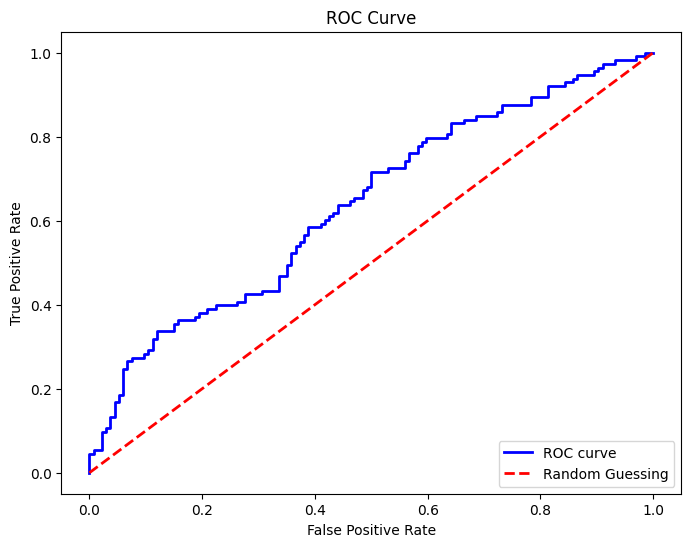

In [3]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

#roc curve plot:
    #receiver operating characteristic
    #plot of the true positive rate (sensitivity) vs false positive rate (1 - specficity)

# finding ROC curve
fpr, tpr, thresholds = roc_curve(y_test, lr_model.predict_proba(X_test_scaled)[:,1])

# plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


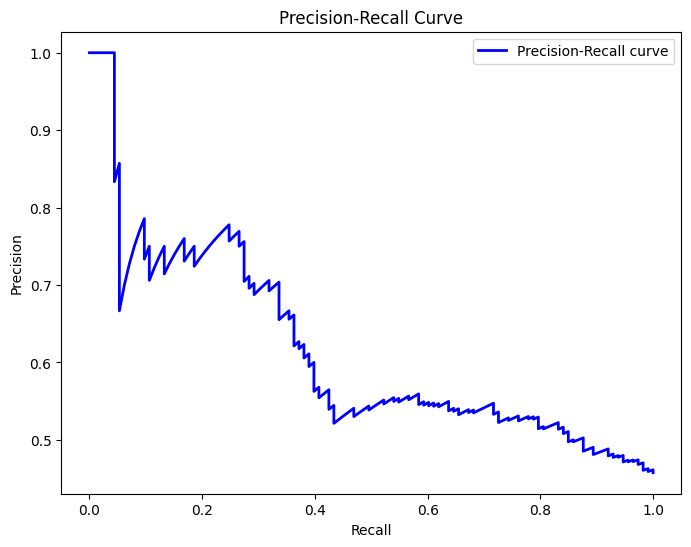

In [4]:
from sklearn.metrics import precision_recall_curve, auc

# precision-recall curve:
    # plots precision (positive predictive value) vs recall (sensitivity)
    #useful for imbalanced datasets
        #pretty sure this is an imbalanced dataset (number of positive cases is not proportional to                 something you would find in the population) so this might be useful
        #random forests are robust to class imbalance so might be a good way to segway into that model?
        
# finding precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, lr_model.predict_proba(X_test_scaled)[:,1])

# plotting precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

[[89 45]
 [60 53]]


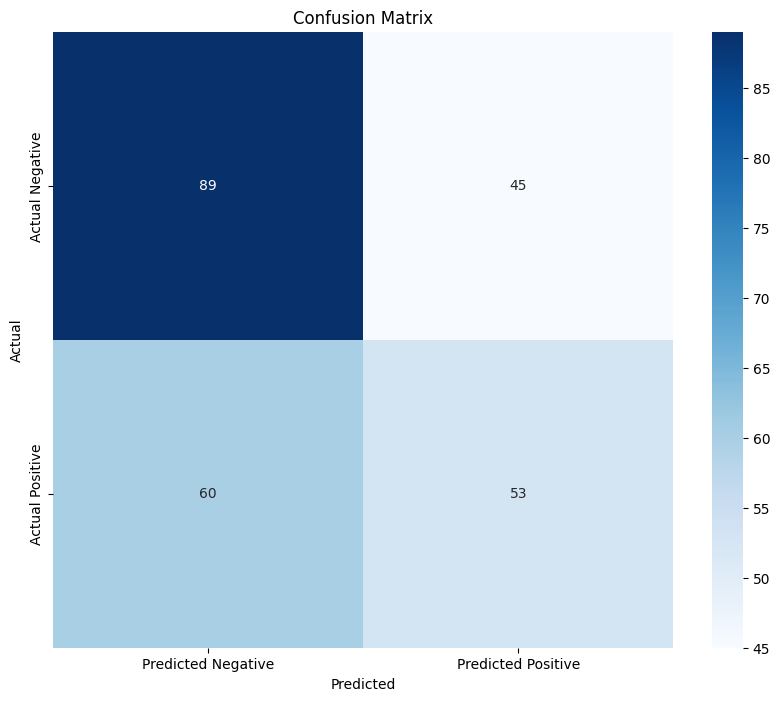

In [5]:
#confusion matrix

from sklearn.metrics import confusion_matrix



# find confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted Negative", "Predicted Positive"], yticklabels=["Actual Negative", "Actual Positive"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')

plt.show()

#cant figure out why the bottom row isnt showing counts??? need to fix this if we want to use this plot 

### accuracy of this model was low, going to try to increase accuracy by selecting sigificant features based on p-value from hypothesis testing

features with p-value greater than a significance level of 0.10 will not be considered significant.

... having a hard time figuring out the code to determine significant features... but i know the significan tones from my summer work so just gonna refit the model with that and we can figure out this middle part later 

look at interaction between famhist & alcohol, and PRS and agemeno


Accuracy:  0.611336032388664

Classification Report: 
              precision    recall  f1-score   support

           0       0.62      0.73      0.67       134
           1       0.60      0.47      0.52       113

    accuracy                           0.61       247
   macro avg       0.61      0.60      0.60       247
weighted avg       0.61      0.61      0.60       247


Confusion Matrix: 
[[98 36]
 [60 53]]
[[98 36]
 [60 53]]


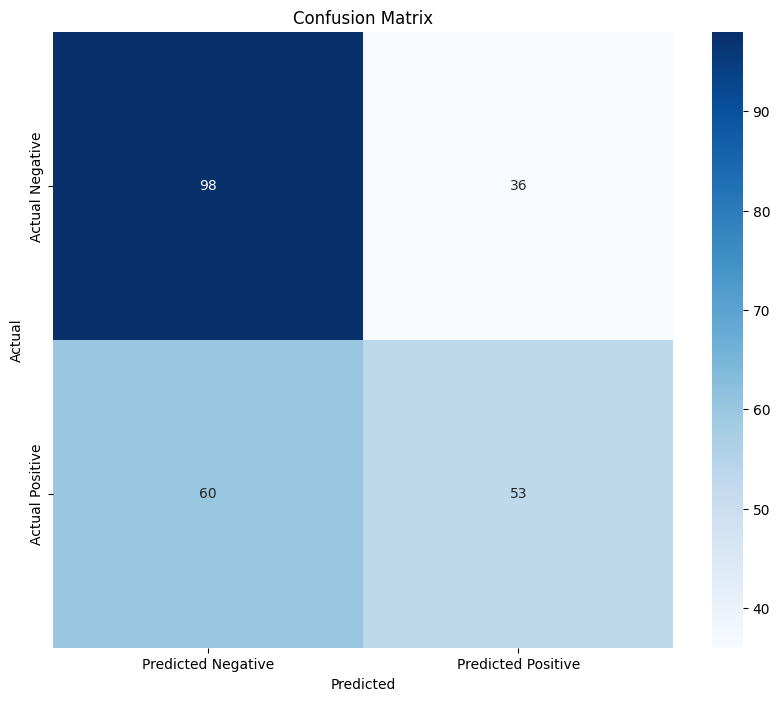

In [6]:
# defining features and target
features = ['parity', 'PRS', 'alcohol', 'smoke.st']
X = bc_df[features]
y = bc_df['caco'] #target variable, 1 = has breast cancer, 0 = doesn't have breast cancer

# spliting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 24)

#standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#train logistic regression model 
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)

#predict on testing set
y_pred = lr_model.predict(X_test_scaled)

#evaluate model 
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

#classification report
print("\nClassification Report: ")
print(classification_report(y_test, y_pred))

#confusion matrix
print("\nConfusion Matrix: ")
print(confusion_matrix(y_test, y_pred))

#confusion matrix


# find confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted Negative", "Predicted Positive"], yticklabels=["Actual Negative", "Actual Positive"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')

plt.show()

now have an accuracy of 0.62, only slightly better

working on random forests model now 

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# selecting features
selected_features = ['parity', 'PRS', 'alcohol', 'smoke.st']
rf_X = bc_df[selected_features]
rf_y = bc_df['caco']  

# splitting data into training and testing sets
rf_X_train, rf_X_test, rf_y_train, rf_y_test = train_test_split(rf_X, rf_y, test_size=0.2, random_state=42)

# intitalizing random forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# fitting the model
rf_classifier.fit(rf_X_train, rf_y_train)

# predictions
rf_y_pred = rf_classifier.predict(rf_X_test)

# evaluate
accuracy = accuracy_score(rf_y_test, rf_y_pred)
print("Accuracy:", accuracy)

print(classification_report(rf_y_test, rf_y_pred))


Accuracy: 0.5303643724696356
              precision    recall  f1-score   support

           0       0.57      0.60      0.59       137
           1       0.47      0.45      0.46       110

    accuracy                           0.53       247
   macro avg       0.52      0.52      0.52       247
weighted avg       0.53      0.53      0.53       247



not a great accuracy here either 

trying a neural network now 

In [8]:
class neural_network(nn.Module):
    def __init__(self, input_dim, width):
        super(neural_network, self).__init__()

        # Increase the depth and width of the network
        self.layers = nn.Sequential(
            nn.Linear(input_dim, width).double(), nn.ReLU(),
            nn.Linear(width, width * 2).double(), nn.ReLU(),  # Increased width
            nn.Linear(width * 2, width * 2).double(), nn.ReLU(),  # Added layer
            nn.Linear(width * 2, width).double(), nn.ReLU(),
            nn.Linear(width, 2).double()
        )

    def forward(self, x):
        x = self.layers(x.double())
        return x

def cross_entropy(model, x, y):
    y = y.long().squeeze()
    return torch.nn.CrossEntropyLoss()(model(x), y)

In [9]:
class CustomDataset(Dataset):
    def __init__(self, xtrain, targets):
        self.xtrain = xtrain
        self.targets = targets
        self.scaler = StandardScaler()
        self.xtrain = torch.tensor(self.scaler.fit_transform(self.xtrain))
        self.targets = torch.tensor(self.targets).long()

    def __len__(self):
        return len(self.xtrain)

    def __getitem__(self, idx):
        x = self.xtrain[idx]
        y = self.targets[idx]
        return x, y

In [14]:
batch_size = 64  # Decrease batch size for more updates
width = 256  # Increase the width of the layers

features = ['agebas', 'bmi', 'agemeno', 'menarche', 'parity', 'famhist', 'PRS', 'alcohol', 'birth', 'height', 'smoke.st']
X = bc_df[features]
y = bc_df['caco']
y = np.ravel(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

traindata = CustomDataset(X_train, y_train)
testdata = CustomDataset(X_test, y_test)
trainloader = DataLoader(traindata, batch_size=batch_size, shuffle=True)
testloader = DataLoader(testdata, batch_size=batch_size, shuffle=False)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(X_train.shape[1])
model = neural_network(X_train.shape[1], width).to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-4)  # Decrease learning rate for finer updates

num_epochs = 1000  # Consider early stopping or adjusting epochs based on validation performance
train_losses = []
test_losses = []

for epoch in trange(num_epochs):
    model.train()
    epoch_train_loss = 0.0
    for features, targets in trainloader:
        features = features.to(device)
        targets = targets.to(device)
        loss = cross_entropy(model, features, targets)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_train_loss += loss.item()

    train_loss = epoch_train_loss / len(trainloader)
    train_losses.append(train_loss)

    model.eval()
    epoch_test_loss = 0.0
    all_predictions = []
    all_labels = []
    with torch.no_grad():
        for features, targets in testloader:
            features = features.to(device)
            targets = targets.to(device)
            outputs = model(features)
            _, predicted = torch.max(outputs, 1)
            predictions_array = predicted.cpu().numpy()
            labels_array = targets.cpu().numpy().squeeze()
            all_predictions.append(predictions_array)
            all_labels.append(labels_array)
            loss = cross_entropy(model, features, targets)
            epoch_test_loss += loss.item()

    test_loss = epoch_test_loss / len(testloader)
    test_losses.append(test_loss)

all_predictions = np.concatenate(all_predictions)
all_labels = np.concatenate(all_labels)

report = metrics.classification_report(all_labels, all_predictions, digits=4)
print(report)
accuracy = metrics.accuracy_score(all_labels, all_predictions)
print("Accuracy: ", accuracy)

cm = metrics.confusion_matrix(all_labels, all_predictions)
print("Confusion Matrix:")
print(cm)

11


  0%|          | 0/1000 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0     0.5328    0.4851    0.5078       134
           1     0.4480    0.4956    0.4706       113

    accuracy                         0.4899       247
   macro avg     0.4904    0.4903    0.4892       247
weighted avg     0.4940    0.4899    0.4908       247

Accuracy:  0.4898785425101215
Confusion Matrix:
[[65 69]
 [57 56]]


In [15]:


features = ['parity', 'PRS', 'alcohol', 'currhrt']
X = bc_df[features]
y = bc_df['caco']
y = np.ravel(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

traindata = CustomDataset(X_train, y_train)
testdata = CustomDataset(X_test, y_test)
trainloader = DataLoader(traindata, batch_size=batch_size, shuffle=True)
testloader = DataLoader(testdata, batch_size=batch_size, shuffle=False)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(X_train.shape[1])
model = neural_network(X_train.shape[1], width).to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-4)  # Decrease learning rate for finer updates

num_epochs = 1000  # Consider early stopping or adjusting epochs based on validation performance
train_losses = []
test_losses = []

for epoch in trange(num_epochs):
    model.train()
    epoch_train_loss = 0.0
    for features, targets in trainloader:
        features = features.to(device)
        targets = targets.to(device)
        loss = cross_entropy(model, features, targets)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_train_loss += loss.item()

    train_loss = epoch_train_loss / len(trainloader)
    train_losses.append(train_loss)

    model.eval()
    epoch_test_loss = 0.0
    all_predictions = []
    all_labels = []
    with torch.no_grad():
        for features, targets in testloader:
            features = features.to(device)
            targets = targets.to(device)
            outputs = model(features)
            _, predicted = torch.max(outputs, 1)
            predictions_array = predicted.cpu().numpy()
            labels_array = targets.cpu().numpy().squeeze()
            all_predictions.append(predictions_array)
            all_labels.append(labels_array)
            loss = cross_entropy(model, features, targets)
            epoch_test_loss += loss.item()

    test_loss = epoch_test_loss / len(testloader)
    test_losses.append(test_loss)

all_predictions = np.concatenate(all_predictions)
all_labels = np.concatenate(all_labels)

report = metrics.classification_report(all_labels, all_predictions, digits=4)
print(report)
accuracy = metrics.accuracy_score(all_labels, all_predictions)
print("Accuracy: ", accuracy)

cm = metrics.confusion_matrix(all_labels, all_predictions)
print("Confusion Matrix:")
print(cm)

4


  0%|          | 0/1000 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0     0.5726    0.5000    0.5339       134
           1     0.4846    0.5575    0.5185       113

    accuracy                         0.5263       247
   macro avg     0.5286    0.5288    0.5262       247
weighted avg     0.5324    0.5263    0.5268       247

Accuracy:  0.5263157894736842
Confusion Matrix:
[[67 67]
 [50 63]]


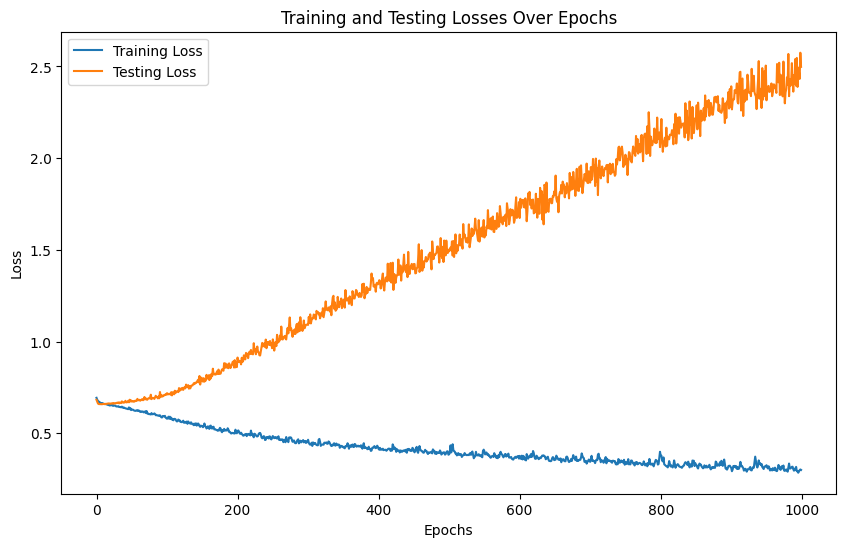

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Testing Losses Over Epochs')
plt.legend()
plt.show()

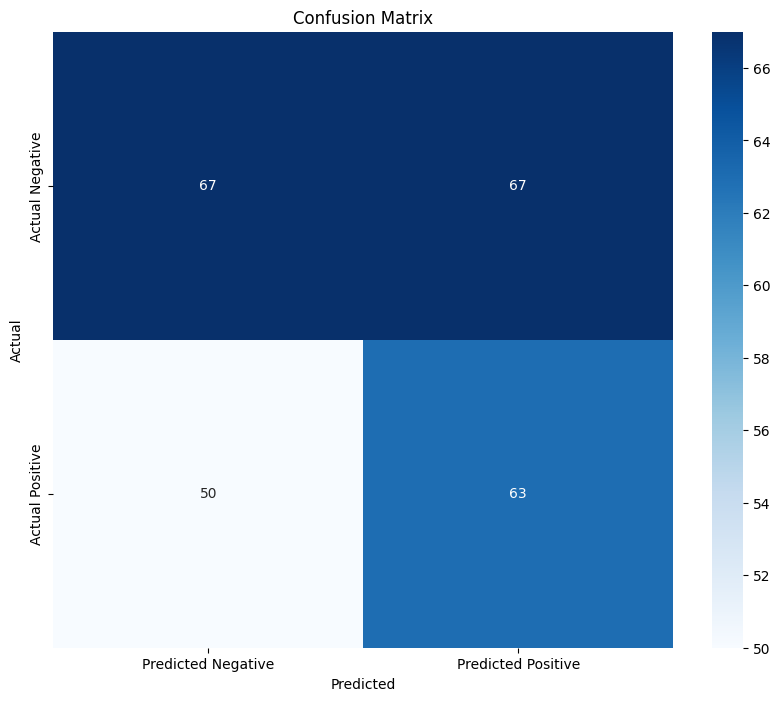

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted Negative", "Predicted Positive"], yticklabels=["Actual Negative", "Actual Positive"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()